In [1]:
# R is a bit more native, so no imports needed.

In [2]:
seq(1, 10) -> time # Mathematically, [1, 10]
2 * time + 10 -> distance

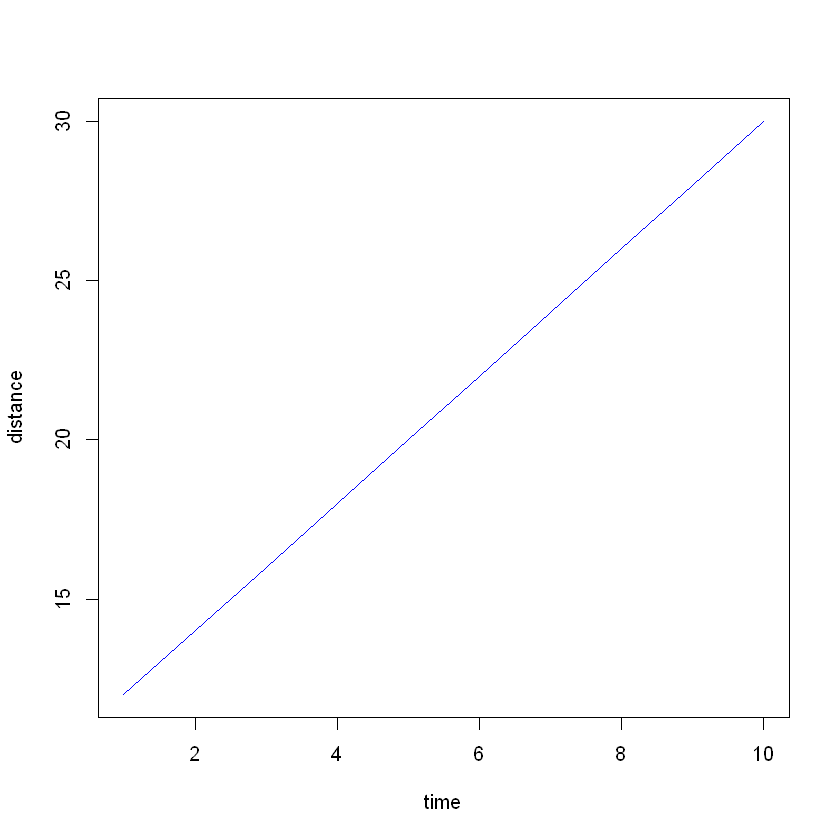

In [3]:
plot(time, distance, type='l', xlab="time", ylab="distance", col = "blue")

# Normal Equation:

In [4]:
g <- 9.8
n <- 25
h0 <- 100
time <- seq(1, 11, len=n)
u <- 0
S <- h0 + u * time - g * time^2/2
distorted_S = S + rnorm(n, sd = 3)

In [5]:
minimize_residuals <- function(Y){
    time <- seq(1, 11, len=n)
    X <- cbind(1, time, time^2)
    A <- solve(crossprod(X)) %*% crossprod(X, Y)
    return(A)
}
compute_G <- function(A){
    return(A[3] * -2)
}
full_compute <- function(Y){
    A = minimize_residuals(Y)
    return(compute_G(A))
}

In [6]:
full_compute(S)

[1] 9.8

In [7]:
full_compute(distorted_S)

[1] 9.714698

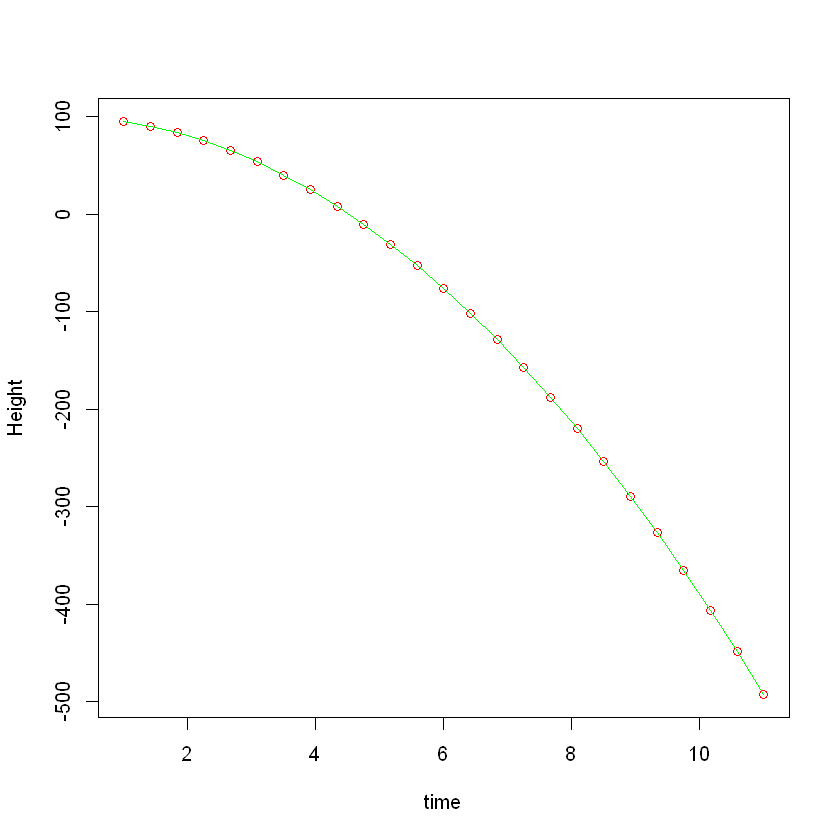

In [8]:
plot(time, S, ylab="Height", col="red")
lines(time, cbind(1, time, time^2) %*% minimize_residuals(S), type='l', col = "green")